Import relevant Libraries

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
original_data = pd.read_csv('models/spotify_songs.csv', sep=',', header=0)
original_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [149]:
original_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [150]:
data = original_data.copy()
data.drop(['playlist_name', 'playlist_id'], axis=1, inplace=True)

# Data Preprocessing & Cleaning

In [151]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [152]:
def min_max_scale(data):
    """
    Standardize data to the range [0, 1] using min-max scaling.

    Parameters:
        data (list or iterable): A list or iterable of numeric values to be scaled.

    Returns:
        list: Min-max scaled values in the range [0, 1].
    """
    # Ensure the input is a list
    data = list(data)
    
    # Find the minimum and maximum values
    min_val = min(data)
    max_val = max(data)
    
    
    # Apply the min-max scaling formula
    scaled_data = [(x - min_val) / (max_val - min_val) for x in data]
    return scaled_data

In [153]:
data['loudness'] = min_max_scale(data['loudness'])
data['instrumentalness'] = min_max_scale(data['instrumentalness'])
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,dance pop,0.748,...,6,0.918090,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,...,11,0.869162,1,0.0373,0.072400,0.004235,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,pop,dance pop,0.675,...,1,0.901368,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,pop,dance pop,0.718,...,7,0.894118,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,pop,dance pop,0.650,...,1,0.875385,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,edm,progressive electro house,0.428,...,2,0.935272,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,edm,progressive electro house,0.522,...,0,0.879785,1,0.0420,0.001710,0.004296,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,edm,progressive electro house,0.529,...,6,0.870628,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,edm,progressive electro house,0.626,...,2,0.902856,1,0.1090,0.007920,0.127767,0.3430,0.3080,128.008,367432


# EDA

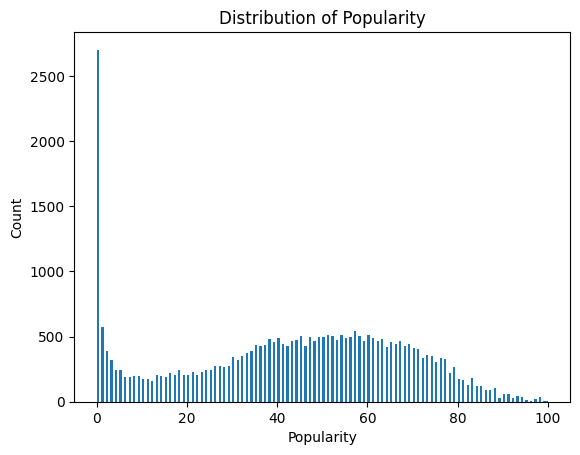

In [154]:
plt.hist(data['track_popularity'], bins=200)
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Distribution of Popularity")
plt.show()

In [155]:
data.dtypes


track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [156]:
"""Cleaning track_id and track_album_id so that they are represented by unique numbers. 
Also renaming some columns for better and cleaner readability of the dataset"""

data.columns = [col.replace('_', ' ') for col in data.columns]
data.rename(columns= {'track id': "Unique ID", 'track name': 'Name', 'track artist': 'Artist', 'track popularity'
                      : 'Popularity', 'track album id': 'Album ID', 'track album name': 'Album name',
                      'track album release date': 'Release date',
                      'playlist genre': 'Genre', 'playlist subgenre': 'Subgenre'}, inplace = True)
data[data['Name'] == 'Blinding Lights']

,Unique ID,Name,Artist,Popularity,Album ID,Album name,Release date,Genre,Subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms
716,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,pop,dance pop,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
1605,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,pop,post-teen pop,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
4713,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,pop,indie poptimism,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
16617,7JAo7wy8BzmP9smtTJ3fuU,Blinding Lights,Lucas Estrada,65,5K1nRHJ9JrwHAGXKc0yrZD,Blinding Lights,2019-08-16,latin,tropical,0.614,...,10,0.860067,1,0.0327,0.16700,0.000413,0.0833,0.479,98.008,130900
18307,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,latin,latin pop,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
19715,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,latin,latin hip hop,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
21571,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,r&b,urban contemporary,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
22933,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,r&b,hip pop,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
30203,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,edm,pop edm,0.513,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573


In [157]:
duplicate_songs = data[data.duplicated(subset='Name', keep=False)]
duplicate_songs

,Unique ID,Name,Artist,Popularity,Album ID,Album name,Release date,Genre,Subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,dance pop,0.748,...,6,0.918090,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,...,11,0.869162,1,0.0373,0.07240,0.004235,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,pop,dance pop,0.675,...,1,0.901368,0,0.0742,0.07940,0.000023,0.1100,0.613,124.008,176616
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,pop,dance pop,0.675,...,8,0.860445,1,0.1270,0.07990,0.000000,0.1430,0.585,124.982,163049
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,pop,dance pop,0.542,...,4,0.922595,0,0.0434,0.03350,0.000005,0.1110,0.367,127.936,207619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,3Gwq0zKnMWluOEPKh93BeC,Lost At Sea,Zedd,51,7juWTdmjo0vYywWu8HiQxs,Clarity,2012-01-01,edm,progressive electro house,0.567,...,6,0.899231,1,0.0364,0.02470,0.000000,0.1240,0.305,127.983,225840
32804,2KlZexJjJPuNWcN5uAG1GU,Gold (feat. Yuna),Adventure Club,1,2DVyzKYzqlQo4uTJLVtvBt,Calling All Heroes - EP,2013-10-22,edm,progressive electro house,0.479,...,9,0.870754,0,0.0413,0.03190,0.005392,0.1280,0.189,145.022,257045
32808,5QcSDOm6mcvFDl7KBT1fHv,Spaceman - Carnage Festival Trap Remix,Hardwell,54,0GjLUjalniPkdkafJnkNFz,Spaceman (Carnage Festival Trap Remix),2012-12-29,edm,progressive electro house,0.712,...,11,0.785198,1,0.0777,0.02350,0.772636,0.1010,0.238,139.987,234160
32824,3zKST4nk4QJE77oLjUZ0Ng,Hey Brother,Avicii,20,02h9kO2oLKnLtycgbElKsw,True,2013-01-01,edm,progressive electro house,0.545,...,7,0.871299,0,0.0436,0.03090,0.000047,0.0828,0.458,125.014,255093


In [158]:
data.drop_duplicates(subset='Name', inplace=True)

In [159]:
data.dropna(inplace=True)

In [160]:
data.shape

(23449, 21)

## Implementing most Popular songs and their image URL

In [161]:
image_data_original = pd.read_csv('models/Music.csv', sep=',', header=0)
image_data_original
image_data = image_data_original.copy()
image_data

,name,artist,spotify_id,preview,img,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist,valence_artist
0,Mood (feat. iann dior),24kGoldn,3tjFYV6RSFtuktYl3ZtYcq,https://p.scdn.co/mp3-preview/45cb08fdb67744ab...,https://i.scdn.co/image/ab67616d0000b273ff8c98...,0.700,0.7220,-3.558,0.0369,0.22100,0.000000,0.2720,0.756,0.118269,0.731588,0.681235,0.000002,0.160000,0.123765,0.566824
1,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,NaN,https://i.scdn.co/image/ab67616d0000b2738863bc...,0.514,0.7300,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811,0.305189
2,Dynamite,BTS,0t1kP63rueHleOhQkYSXFY,https://p.scdn.co/mp3-preview/a707728846c105f4...,https://i.scdn.co/image/ab67616d0000b273755995...,0.746,0.7650,-4.410,0.0993,0.01120,0.000000,0.0936,0.737,0.099350,0.614798,0.786452,0.000044,0.202608,0.128515,0.533369
3,ROCKSTAR (feat. Roddy Ricch),DaBaby,7ytR5pFWmSjzHJIeQkgog4,NaN,https://i.scdn.co/image/ab67616d0000b27320e08c...,0.746,0.6900,-7.956,0.1640,0.24700,0.000000,0.1010,0.497,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725,0.629374
4,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,0PvFJmanyNQMseIFrU708S,NaN,https://i.scdn.co/image/ab67616d0000b27377ada0...,0.823,0.5860,-6.606,0.2000,0.11400,0.000000,0.1930,0.347,0.191520,0.675143,0.702686,0.000194,0.247669,0.280103,0.490229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65790,History Lesson Part 2,Minutemen,45fq6kIQtooot7WVRsXAum,no,no,0.683,0.2410,-16.192,0.0475,0.34800,0.522000,0.0850,0.727,0.136984,0.567857,0.655143,0.243869,0.155798,0.107776,0.701500
65791,Call My Name,Michael Bolton,0G6Hw9ya7p6EbmA6VEQfmD,no,no,0.631,0.4420,-13.753,0.0366,0.14500,0.000010,0.2160,0.149,0.256120,0.525369,0.498985,0.000008,0.157334,0.038111,0.344474
65792,Welcome To The Working Week,Elvis Costello,39rkLB2TEENIvhwAlRC5ae,no,no,0.505,0.7010,-7.895,0.2450,0.06170,0.000009,0.1390,0.780,0.234415,0.631308,0.596400,0.007278,0.186954,0.065646,0.724785
65793,Patricia,Art Pepper,5LlKdhNsw0fqkiHxU2lNkj,no,no,0.654,0.0494,-17.504,0.0753,0.97300,0.519000,0.0842,0.325,0.629214,0.610847,0.327817,0.161744,0.152172,0.070392,0.647817


In [162]:

image_data = image_data[image_data['img'] != 'no']
image_data = image_data[['name', 'artist', 'img']]
data = image_data.merge(data, left_on=['name', 'artist'], right_on=['Name', 'Artist'], how='inner')

data

,name,artist,img,Unique ID,Name,Artist,Popularity,Album ID,Album name,Release date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms
0,Blinding Lights,The Weeknd,https://i.scdn.co/image/ab67616d0000b2738863bc...,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.345,171.017,201573
1,Someone You Loved,Lewis Capaldi,https://i.scdn.co/image/ab67616d0000b273fc2101...,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,...,1,0.854284,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161
2,Circles,Post Malone,https://i.scdn.co/image/ab67616d0000b2739478c8...,4VginDwYTP2eaHJzO0QMjG,Circles,Post Malone,49,75n7rjlC1fxezRtoMQmtL5,Circles,2019-08-30,...,0,0.899168,1,0.0402,0.23300,0.001449,0.0924,0.534,120.003,214907
3,Memories,Maroon 5,https://i.scdn.co/image/ab67616d0000b273b8c013...,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,...,11,0.822224,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486
4,The Box,Roddy Ricch,https://i.scdn.co/image/ab67616d0000b273600adb...,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,...,10,0.833162,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,You Are Holy,Lisa McClendon,https://i.scdn.co/image/ab67616d0000b273d686a7...,6WMqWv1edtt1OL1jre38pL,You Are Holy,Lisa McClendon,0,3eQxbR20L2D8vvesbLHuLs,Sistas In The Spirit,2006-10-10,...,10,0.764663,0,0.0299,0.73900,0.000000,0.1130,0.211,105.011,318293
4939,One of These Nights - 2013 Remaster,Eagles,https://i.scdn.co/image/ab67616d0000b273061849...,608xszaAxVh4m7NcKJiAbF,One of These Nights - 2013 Remaster,Eagles,68,0F77QekrNe8vVAjU2sepja,One of These Nights (2013 Remaster),1975,...,7,0.755673,1,0.0285,0.06030,0.079376,0.0757,0.765,110.061,291686
4940,Bowtie (feat. Sleepy Brown & Jazze Pha),OutKast,https://i.scdn.co/image/ab67616d0000b2736a6387...,5voPrNQYQ4kQoRZ9A2NghB,Bowtie (feat. Sleepy Brown & Jazze Pha),OutKast,40,1UsmQ3bpJTyK6ygoOOjG1r,Speakerboxxx/The Love Below,2003,...,1,0.873122,1,0.2620,0.34000,0.000000,0.3030,0.648,98.532,236640
4941,Where Are You Tonight,Coro,https://i.scdn.co/image/ab67616d0000b273d190ea...,524wRHQekJJvQWtAIy115v,Where Are You Tonight,Coro,38,7E4FS3eSJtdjI00NBbtnDY,Freestyle's Best Extended Versions Volumes 1 & 2,2003,...,6,0.756805,0,0.0586,0.00522,0.102616,0.0850,0.670,118.343,313507


In [165]:
popular_data = data.copy()
popular_data = popular_data[['name', 'artist', 'img', 'Popularity', 'Genre', 'Subgenre']]
popular_data.sort_values(by='Popularity', ascending=False, inplace=True)
popular_data.drop_duplicates(subset=['name'], inplace=True)
popular_data

,name,artist,img,Popularity,Genre,Subgenre
0,Blinding Lights,The Weeknd,https://i.scdn.co/image/ab67616d0000b2738863bc...,98,pop,dance pop
4,The Box,Roddy Ricch,https://i.scdn.co/image/ab67616d0000b273600adb...,98,rap,hip hop
6,Tusa,KAROL G,https://i.scdn.co/image/ab67616d0000b273ddd315...,98,pop,dance pop
3,Memories,Maroon 5,https://i.scdn.co/image/ab67616d0000b273b8c013...,98,pop,dance pop
11,everything i wanted,Billie Eilish,https://i.scdn.co/image/ab67616d0000b273f2248c...,97,pop,dance pop
...,...,...,...,...,...,...
4496,FMLYHM,Seether,https://i.scdn.co/image/ab67616d0000b273c41822...,0,rock,hard rock
3592,Coming Down,Five Finger Death Punch,https://i.scdn.co/image/ab67616d0000b2736f68f1...,0,rock,hard rock
4493,Seek Bromance (Avicii Vocal Edit),Tim Berg,https://i.scdn.co/image/ab67616d0000b273059fc1...,0,edm,progressive electro house
4776,The Format,AZ,https://i.scdn.co/image/ab67616d0000b2734debc8...,0,rap,southern hip hop


In [146]:
image_data.sort_values(by='Popularity', ascending=False, inplace=True)
image_data.head(10)

,name_x,artist_x,img_x,name_y,artist_y,img_y,Unique ID,Name,Artist,Popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms
0,Blinding Lights,The Weeknd,https://i.scdn.co/image/ab67616d0000b2738863bc...,Blinding Lights,The Weeknd,https://i.scdn.co/image/ab67616d0000b2738863bc...,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,...,1,0.887895,1,0.0629,0.00147,0.000210,0.0938,0.3450,171.017,201573
4,The Box,Roddy Ricch,https://i.scdn.co/image/ab67616d0000b273600adb...,The Box,Roddy Ricch,https://i.scdn.co/image/ab67616d0000b273600adb...,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,...,10,0.833162,0,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,196653
6,Tusa,KAROL G,https://i.scdn.co/image/ab67616d0000b273ddd315...,Tusa,KAROL G,https://i.scdn.co/image/ab67616d0000b273ddd315...,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,...,2,0.904553,1,0.2980,0.29500,0.000135,0.0574,0.5740,101.085,200960
3,Memories,Maroon 5,https://i.scdn.co/image/ab67616d0000b273b8c013...,Memories,Maroon 5,https://i.scdn.co/image/ab67616d0000b273b8c013...,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,...,11,0.822224,1,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,189486
11,everything i wanted,Billie Eilish,https://i.scdn.co/image/ab67616d0000b273f2248c...,everything i wanted,Billie Eilish,https://i.scdn.co/image/ab67616d0000b273f2248c...,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,Billie Eilish,97,...,6,0.670410,0,0.0994,0.90200,0.660966,0.1060,0.2430,120.006,245426
21,Don't Start Now,Dua Lipa,https://i.scdn.co/image/ab67616d0000b2738583df...,Don't Start Now,Dua Lipa,https://i.scdn.co/image/ab67616d0000b2738583df...,6WrI0LAC5M1Rw2MnX2ZvEg,Don't Start Now,Dua Lipa,97,...,11,0.878549,0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,183290
5,bad guy,Billie Eilish,https://i.scdn.co/image/ab67616d0000b27350a314...,bad guy,Billie Eilish,https://i.scdn.co/image/ab67616d0000b27350a314...,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,95,...,7,0.743520,1,0.3750,0.32800,0.130785,0.1000,0.5620,135.128,194088
7,HIGHEST IN THE ROOM,Travis Scott,https://i.scdn.co/image/ab67616d0000b273e42b5f...,HIGHEST IN THE ROOM,Travis Scott,https://i.scdn.co/image/ab67616d0000b273e42b5f...,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94,...,7,0.789640,0,0.0317,0.05460,0.000006,0.2100,0.0605,76.469,175721
117,My Oh My (feat. DaBaby),Camila Cabello,https://i.scdn.co/image/ab67616d0000b2735f53c0...,My Oh My (feat. DaBaby),Camila Cabello,https://i.scdn.co/image/ab67616d0000b2735f53c0...,3yOlyBJuViE2YSGn3nVE1K,My Oh My (feat. DaBaby),Camila Cabello,94,...,8,0.847055,1,0.0296,0.01800,0.000013,0.0887,0.3830,105.046,170746
1,Someone You Loved,Lewis Capaldi,https://i.scdn.co/image/ab67616d0000b273fc2101...,Someone You Loved,Lewis Capaldi,https://i.scdn.co/image/ab67616d0000b273fc2101...,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,...,1,0.854284,1,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,182161


In [121]:
popular_artists = image_data.groupby('artist').agg({'Popularity': 'mean', 'img': 'first' }).reset_index()
popular_artists.sort_values(by='Popularity', ascending=False, inplace=True)
popular_artists.head(5)

,artist,Popularity,img
2064,Y2K,91.0,https://i.scdn.co/image/ab67616d0000b2738a6ccb...
453,Dan + Shay,91.0,https://i.scdn.co/image/ab67616d0000b27386953b...
1600,SHAED,90.0,https://i.scdn.co/image/ab67616d0000b273376ab4...
1771,Tainy,90.0,https://i.scdn.co/image/ab67616d0000b27354e5ae...
102,Ant Saunders,89.0,https://i.scdn.co/image/ab67616d0000b273a09485...


# Implementing the Search Engine

In [15]:
SE_data = data.copy()
SE_data

,Unique ID,Name,Artist,Popularity,Album ID,Album name,Release date,Genre,Subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,dance pop,0.748,...,6,0.918090,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,...,11,0.869162,1,0.0373,0.072400,0.004235,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,pop,dance pop,0.675,...,1,0.901368,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,pop,dance pop,0.718,...,7,0.894118,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,pop,dance pop,0.650,...,1,0.875385,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,edm,progressive electro house,0.428,...,2,0.935272,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,edm,progressive electro house,0.522,...,0,0.879785,1,0.0420,0.001710,0.004296,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,edm,progressive electro house,0.529,...,6,0.870628,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,edm,progressive electro house,0.626,...,2,0.902856,1,0.1090,0.007920,0.127767,0.3430,0.3080,128.008,367432


For the search engine part, we will only mostly need the name and some other properties. 
Therefore, I am going to drop almost all the columns with the exception of a few that I see being relevant.

In [16]:
SE_data = SE_data[['Name', 'Artist', 'Popularity', 'Release date', 'Genre', 'Subgenre']]
SE_data

,Name,Artist,Popularity,Release date,Genre,Subgenre
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,pop,dance pop
1,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,pop,dance pop
2,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,pop,dance pop
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,pop,dance pop
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,pop,dance pop
...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,2014-04-28,edm,progressive electro house
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,2013-03-08,edm,progressive electro house
32830,Sweet Surrender - Radio Edit,Starkillers,14,2014-04-21,edm,progressive electro house
32831,Only For You - Maor Levi Remix,Mat Zo,15,2014-01-01,edm,progressive electro house


In [17]:
SE_data['Genre'] = SE_data['Genre'].astype(str)
SE_data['Subgenre'] = SE_data['Subgenre'].astype(str)
SE_data.dtypes

/var/folders/5r/1lsvb2gx50n91j4gfq7gvff80000gn/T/ipykernel_2846/1288530348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SE_data['Genre'] = SE_data['Genre'].astype(str)
/var/folders/5r/1lsvb2gx50n91j4gfq7gvff80000gn/T/ipykernel_2846/1288530348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SE_data['Subgenre'] = SE_data['Subgenre'].astype(str)


Name            object
Artist          object
Popularity       int64
Release date    object
Genre           object
Subgenre        object
dtype: object

Using inverted index to get song indices from the dataset and output these songs.

In [18]:
from collections import defaultdict

song_names = SE_data['Name']

inverted_index = defaultdict(list)
for i, song in enumerate(song_names):
    for word in song.lower().split():
        inverted_index[word].append(i)

query = "Shape"
matched_indices = inverted_index.get(query.lower(), [])

results_df = SE_data.iloc[matched_indices]

results_df = results_df.sort_values(by='Popularity', ascending=False)

results_df

,Name,Artist,Popularity,Release date,Genre,Subgenre
1218,Shape of You,Ed Sheeran,86,2017-03-03,pop,dance pop
13775,Shape Of My Heart,Sting,72,1993-03-09,rock,permanent wave
13032,The Shape I'm In - Remastered 2000,The Band,54,1970-08-17,rock,classic rock
30167,Shape of You - Galantis Remix,Ed Sheeran,51,2017-02-10,edm,pop edm


In [19]:
query_2 = "Love"

matched_indices_2 = inverted_index.get(query_2.lower(), [])
results_df_2 = SE_data.iloc[matched_indices_2]
results_df_2 = results_df_2.sort_values(by='Popularity', ascending=False)

results_df_2

,Name,Artist,Popularity,Release date,Genre,Subgenre
739,Lose You To Love Me,Selena Gomez,93,2019-10-23,pop,dance pop
41,Higher Love,Kygo,87,2019-06-28,pop,dance pop
22101,i love you,Billie Eilish,85,2019-03-29,r&b,urban contemporary
10787,Fuck Love (feat. Trippie Redd),XXXTENTACION,84,2017-08-25,rap,trap
199,Used To Love (with Dean Lewis),Martin Garrix,83,2019-10-31,pop,dance pop
...,...,...,...,...,...,...
15881,Love the Way You Hate Me,Like A Storm,0,2012-11-05,rock,hard rock
24759,Money Can't Buy You Love - Mo' Money/Soundtrac...,Ralph Tresvant,0,2005-01-01,r&b,new jack swing
29118,Love Comes Again (Exodus & Hugo Rizzo Remix),Tiësto,0,2013-11-04,edm,big room
29047,Waiting For Love - Carnage & Headhunterz Remix,Avicii,0,2015-07-10,edm,big room


# Playlist creation and recommender

The recommender will:
- Prompt the user to enter their top 5 most favorite songs using the search engine
- Prompt the user of their 3 most favorite genres
- Then from here the algorithm will use content based filtering and pick the most similar songs based on song properties

In [22]:
from sklearn.preprocessing import MinMaxScaler
recommend_data = data.copy()
scaler = MinMaxScaler()
numeric_features = ['danceability', 'tempo', 'valence', 'acousticness', 'Popularity']
recommend_data[numeric_features] = scaler.fit_transform(recommend_data[numeric_features])


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Select features for similarity calculation
features = ['danceability', 'tempo', 'valence', 'acousticness', 'Popularity']
song_features = recommend_data[features]

# Compute pairwise cosine similarity between all songs
similarity_matrix = cosine_similarity(song_features)


In [27]:
def recommend_songs(user_songs, data, similarity_matrix, num_recommendations=2):
    """
    Recommend similar songs based on input songs.
    
    Args:
    - user_songs: List of song names input by the user.
    - data: DataFrame containing the song data.
    - similarity_matrix: Precomputed similarity matrix.
    - num_recommendations: Number of recommendations per input song.
    
    Returns:
    - DataFrame of recommended songs.
    """
    user_indices = data[data['Name'].isin(user_songs)].index

    recommendations = []

    for user_index in user_indices:
        similarity_scores = list(enumerate(similarity_matrix[user_index]))

        sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        sorted_scores = [score for score in sorted_scores if score[0] != user_index]

        top_recommendations = sorted_scores[:num_recommendations]

        for rec_index, score in top_recommendations:
            recommendations.append({
                'Input Song': data.iloc[user_index]['Name'],
                'Recommended Song': data.iloc[rec_index]['Name'],
                'Artist': data.iloc[rec_index]['Artist'],
                'Similarity Score': score
            })

    return pd.DataFrame(recommendations)


In [29]:
user_input_songs = [
    "I Don't Care (with Justin Bieber) - Loud Luxur...",
    "Memories - Dillon Francis Remix"
]

recommended_songs = recommend_songs(user_input_songs, SE_data, similarity_matrix, num_recommendations=2)
print(recommended_songs)


                        Input Song  \
0  Memories - Dillon Francis Remix   
1  Memories - Dillon Francis Remix   

                              Recommended Song           Artist  \
0                Falsas Mentiras (feat. Ozuna)  Los De La Nazza   
1  Post to Be (feat. Chris Brown & Jhene Aiko)          Omarion   

   Similarity Score  
0          0.999848  
1          0.999790  
